In [2]:
import sys

In [6]:
pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 19.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 32.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 21.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.11/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 2.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 27.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.6/242.6 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 43.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 40.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 9.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.11/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


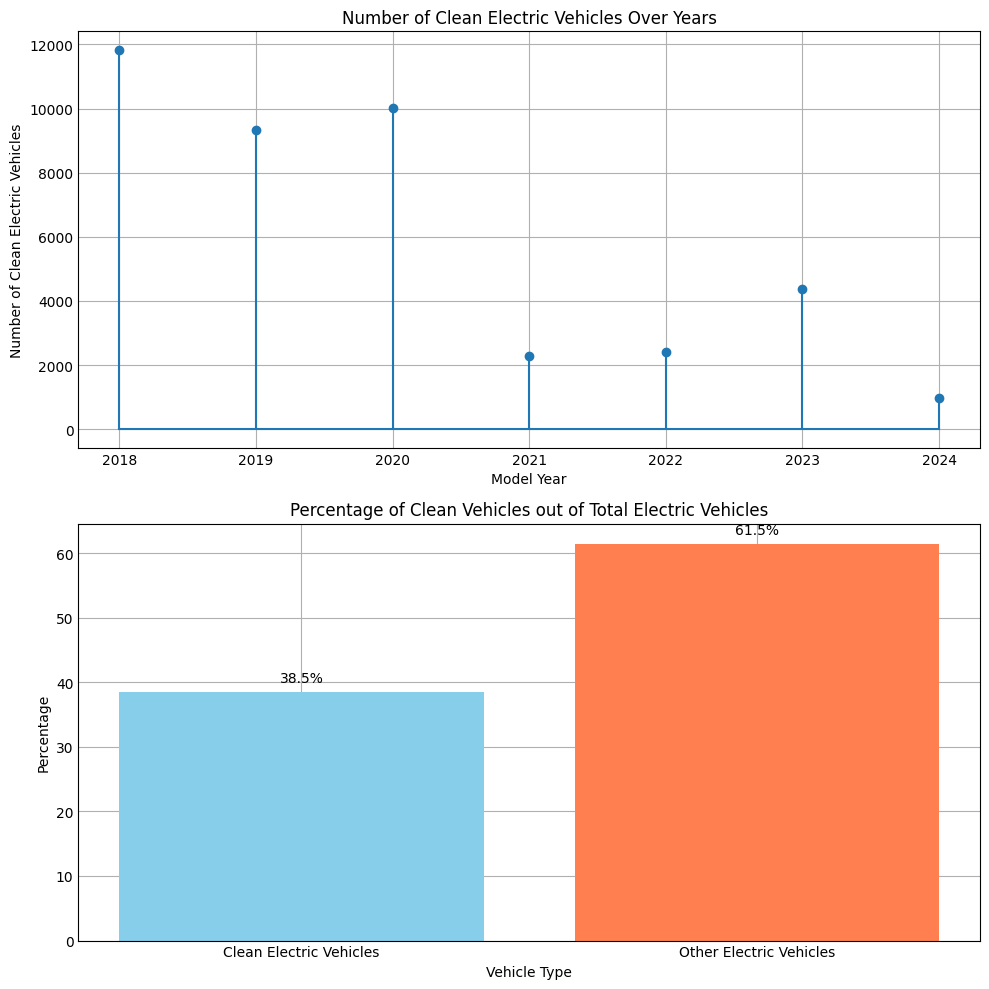

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('_mpl-gallery')

# Read the CSV file
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
df.rename(columns={'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV'}, inplace=True)

# Calculate the total number of electric vehicles and the number of clean vehicles
total_vehicles = df['CAFV'].str.contains('a').sum()
clean_count = df['CAFV'].str.contains('Clean').sum()

# Calculate the percentage of clean vehicles
percent_clean = (clean_count / total_vehicles) * 100

# Filter data for years after 2017
df_filtered = df[df['Model Year'] > 2017]

# Group by 'Model Year' and count occurrences of 'Clean'
clean_count_by_yr = df_filtered[df_filtered['CAFV'].str.contains('Clean')].groupby('Model Year').size()

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 10))

# Plot stem plot
ax1.stem(clean_count_by_yr.index, clean_count_by_yr)
ax1.set(xlabel='Model Year', ylabel='Number of Clean Electric Vehicles', title='Number of Clean Electric Vehicles Over Years')

# Plot bar plot for percentage
ax2.bar(['Clean Electric Vehicles', 'Other Electric Vehicles'], [percent_clean, 100 - percent_clean], color=['skyblue', 'coral'])
ax2.set(xlabel='Vehicle Type', ylabel='Percentage', title='Percentage of Clean Vehicles out of Total Electric Vehicles')

# Display percentages on top of the bars
for i, percent in enumerate([percent_clean, 100 - percent_clean]):
    ax2.text(i, percent + 1, f'{percent:.1f}%', ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
